<a href="https://colab.research.google.com/github/DevanshPatel234/FMML_Project_and_Labs/blob/main/Implementation%20of%20RNN%20using%20Pytorch1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementation of RNN using Pytorch

Recurrent Neural Networks (RNNs) are a type of artificial neural network designed for processing sequences of data. Unlike traditional feedforward neural networks, RNNs have connections that form directed cycles, allowing them to maintain a memory of previous inputs. This makes RNNs particularly well-suited for tasks where the order of data is important, such as time series prediction, natural language processing, and speech recognition.

The key feature of RNNs is their hidden state, which captures information from previous time steps. At each time step t, the RNN takes an input and updates its hidden state ht using the following equations:
ht=𝜎(Whht-1+Wxxt+b)
yt=Wyht+c


Here,C is a non-linear activation function (e.g., tanh or ReLU), Wh,Wx,Wy
are weight matrices, and b and c are biases.

One of the main challenges with RNNs is the vanishing gradient problem, which makes it difficult for the network to learn long-range dependencies. Variants like Long Short-Term Memory (LSTM) and Gated Recurrent Unit (GRU) were developed to address this issue.

Import Libraries

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

from torch.utils.data import DataLoader
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.autograd import Variable

In [2]:
device= torch.device('cuda' if torch.cuda.is_available() else 'cpu')

Prepare Dataset

In [4]:
train_data=datasets.MNIST(
    root='data/',
    train=True,
    transform=transforms.ToTensor(),
    download=True
)

test_data=datasets.MNIST(
    root='data/',
    train=False,
    transform=transforms.ToTensor(),
    download=True
)

train_loader=DataLoader(
    dataset=train_data,
    batch_size=batch_size,
    shuffle=True
)

test_loader=DataLoader(
    dataset=test_data,
    batch_size=batch_size,
    shuffle=True
)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 16253400.64it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 490986.48it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 4440841.61it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 5146009.93it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [6]:
batch_size=100
n_iter=8000

n_epoch=n_iter/(len(train_data)/batch_size)
n_epoch=int(n_epoch)

(<matplotlib.image.AxesImage at 0x7ecce49dd330>, 6)

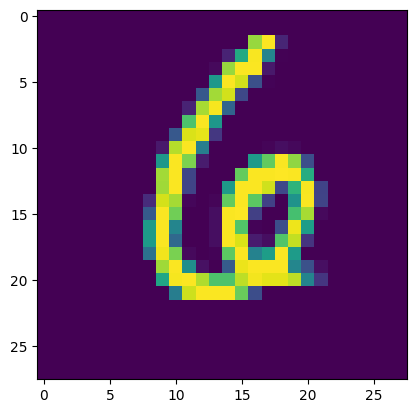

In [5]:
import matplotlib.pyplot as plt
idx=123
plt.imshow(test_data[idx][0].reshape(28,28)), test_data[idx][1]

In [7]:
test_data[idx][0].shape

torch.Size([1, 28, 28])

Create RNN Model

In [8]:
class RNN_model(nn.Module):
  def __init__(self, input_dim, hidden_dim, layer_dim, num_class):
    super(RNN_model, self).__init__()

    self.hidden_dim=hidden_dim
    self.layer_dim=layer_dim

    self.rnn=nn.RNN(input_dim, hidden_dim, layer_dim, batch_first=True,nonlinearity='relu')
    self.fc=nn.Linear(hidden_dim,num_class)

    #self.dropout = nn.Dropout(p=0.5)
    self.softmax=nn.Softmax(dim=1)

  def forward(self,x):

    #h0=Variable(torch.zeros(self.layer_dim, x.size(0), self.hidden_dim)).to(device)

    out, hn = self.rnn(x)
    #out=self.dropout(out)
    out=self.fc(out[:,-1,:])


    return out


Instantiate Model

Instantiate Loss

Instantiate Optimizer

In [9]:
input_dim=28
hidden_dim=100
layer_dim=2
num_class=10

lr=0.05

model=RNN_model(input_dim, hidden_dim, layer_dim, num_class).to(device)

loss=nn.CrossEntropyLoss()
optimizer=optim.SGD(model.parameters(),lr=lr)


Traning the Model

In [10]:
seq_len=28


lost_epoc=[]
iter_list=[]
accuracy_list=[]

count=0

for ep in range(n_epoch):
  print(f' epoch number------->{ep}')

  for i, (image,target) in enumerate(train_loader):

    data=Variable(image.reshape(-1,seq_len,input_dim))
    data=data.to(device=device)

    target=Variable(target).to(device=device)

    optimizer.zero_grad()

    scores=model(data)
    error=loss(scores,target)

    error.backward()

    optimizer.step()

    count += 1

    if count % 250 ==0:

        correct=0
        total=0

        for image,target in test_loader:

            data=Variable(image.reshape(-1,seq_len,input_dim))
            data=data.to(device=device)

            target=Variable(target).to(device=device)


            out=model(data)

            predicted=torch.max(out,1)[1]

            total+= target.size(0)

            correct += (predicted==target).sum()

        accuracy =100* correct / float(total)

        lost_epoc.append(error.data)
        iter_list.append(count)
        accuracy_list.append(accuracy)

        print(f'Iteration:{count}-------> Loss:{error.data}, Accuracy: {accuracy}%')



 epoch number------->0
Iteration:250-------> Loss:2.303762912750244, Accuracy: 11.34999942779541%
Iteration:500-------> Loss:2.275005578994751, Accuracy: 17.869998931884766%
 epoch number------->1
Iteration:750-------> Loss:1.153594732284546, Accuracy: 54.88999938964844%
Iteration:1000-------> Loss:1.1288831233978271, Accuracy: 63.519996643066406%
 epoch number------->2
Iteration:1250-------> Loss:0.49632376432418823, Accuracy: 79.75%
Iteration:1500-------> Loss:0.5496236681938171, Accuracy: 82.63999938964844%
Iteration:1750-------> Loss:0.6355524063110352, Accuracy: 89.45999908447266%
 epoch number------->3
Iteration:2000-------> Loss:0.21924161911010742, Accuracy: 92.5199966430664%
Iteration:2250-------> Loss:0.7748001217842102, Accuracy: 76.73999786376953%
 epoch number------->4
Iteration:2500-------> Loss:0.19581195712089539, Accuracy: 91.98999786376953%
Iteration:2750-------> Loss:0.29851290583610535, Accuracy: 92.93999481201172%
Iteration:3000-------> Loss:0.13670092821121216, Ac

Prediction

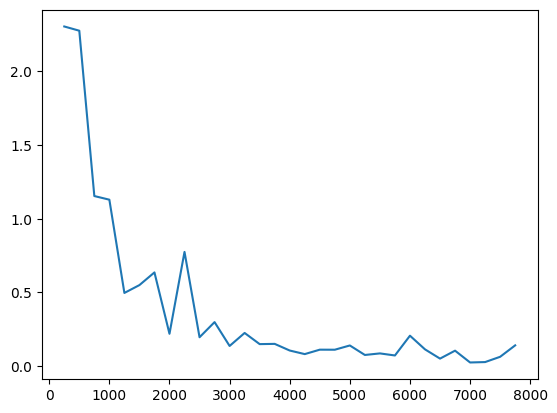

In [11]:
lss=[float(x.cpu()) for x in lost_epoc]
plt.plot(iter_list,lss)

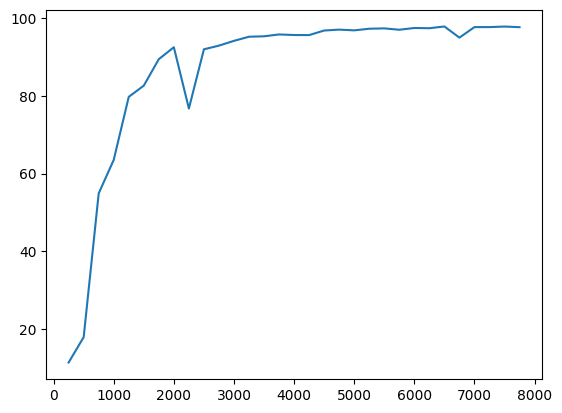

In [12]:
acc=[float(x.cpu()) for x in accuracy_list]
plt.plot(iter_list,acc)